In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import requests
%matplotlib inline

In [3]:
stock_dict = {}

stock_list = []

date = input("Pick a start date for your analysis (YYYY-MM-DD): ")

while (True):
    name = input("Add a stock ticker to the list: ")
    stock_dict[name] = date
    stock_list.append(name)
    cont = input("Press 'y' to Add Another Stock, press 'Enter' to exit")
    if cont == "":
        break;

Pick a start date for your analysis (YYYY-MM-DD):  2015-01-01
Add a stock ticker to the list:  TSLA
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  MSFT
Press 'y' to Add Another Stock, press 'Enter' to exit 


In [ ]:
stock_dict

In [ ]:
for key, value in stock_dict.items():
    print(value)

In [4]:
def stockCreation(stock_dict, stock_list):
    func_list = []
    for key, value in stock_dict.items():
        globals()[key] = pdr.DataReader(f'{key}','yahoo',value)
        globals()[key] = globals()[key]['Adj Close']
        func_list.append(globals()[key])
    
    portfolio = pd.concat(func_list, axis='columns', join='inner')
    portfolio.columns = stock_list
    
    return portfolio

In [5]:
portfolio = stockCreation(stock_dict, stock_list)
portfolio.head()

,TSLA,MSFT
Date,,
2015-01-02,43.862000,41.539135
2015-01-05,42.018002,41.157158
2015-01-06,42.256001,40.553074
2015-01-07,42.189999,41.068310
2015-01-08,42.124001,42.276463


In [6]:
def get_symbol(symbol):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)
    result = requests.get(url).json()
    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']
company = portfolio.columns[0]
company_name = get_symbol(company)
print(f"The tick symbol {company} is the company {company_name}")

The tick symbol TSLA is the company Tesla, Inc.


# Performance Analysis

To check a stock's performance we look at the historical prices in time. However; in order to understand its performance, there should be a comparison with other company stocks or general market trends. Prices can not be used to compare different companies; therefore, returns in percentage are calculated to have a meaningful comparison and performance analysis. 

### *Daily Return* 
Looking at the daily returns of stocks helps to see daily performance comparisons. 


This graph shows us daily percent changes of ['TSLA', 'MSFT'].


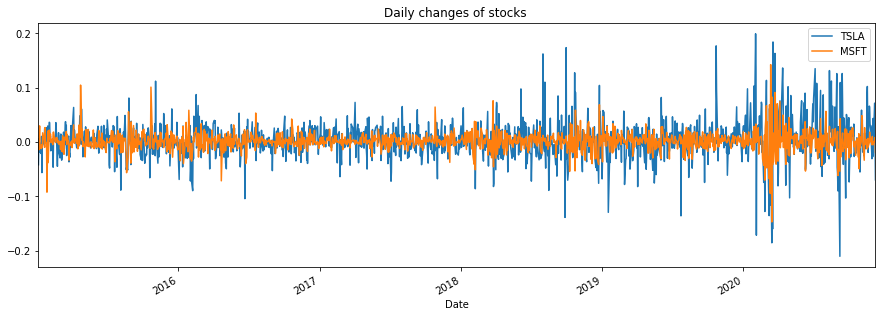

In [7]:
stock_performance = portfolio.pct_change().dropna()
stock_performance_plt = stock_performance.plot.line(title = "Daily changes of stocks ", figsize=(15,5))
stock_performance_plt

print(f"This graph shows us daily percent changes of {stock_list}.")

### *Cumulative Return* 
Looking at the cumulative return of stocks helps to see general performance comparison in a timespan. 


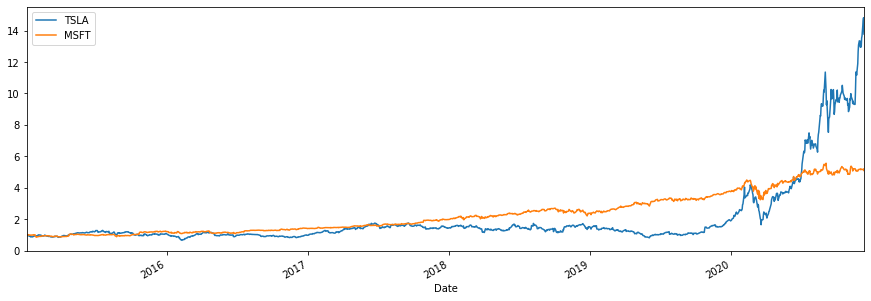

In [8]:
stock_performance_cum = (1+stock_performance).cumprod()
stock_performance_cum_plt = stock_performance_cum.plot.line(figsize=(15,5))
stock_performance_cum_plt